<a href="https://colab.research.google.com/github/Goheekin/FYP_Work/blob/main/FYP_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [ ]:
pip install emoji

     |████████████████████████████████| 168 kB 14.6 MB/s 
  Created wheel for emoji: filename=emoji-1.6.0-py3-none-any.whl size=168256 sha256=83d5ce7204724c1073712cfac02ece664afc999b68e1ae7d273700bc8de86cbc
  Stored in directory: /root/.cache/pip/wheels/f7/d7/74/c720aaf345a042b0c2d74361873258c5e8649b7f11b2ccce49
Successfully built emoji


In [ ]:
## Libraries
## Dataframe & text analytics
import pandas as pd
import numpy as np
from textblob import TextBlob
import wordcloud 
import matplotlib.pyplot as plt
import re
import spacy
import emoji

## Split train & test
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

## ML Algorithms
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression

## Optimization
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter

## Evaluation
from sklearn.metrics import classification_report #classification report
from sklearn.metrics import accuracy_score


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


# **Data Exploration**

In [ ]:
## Read Excel file with xlsx format
df = pd.read_excel("Student_Dataset.xlsx")
df

,Timestamp,Full Name,Age,Gender,Region,Current Education,Which device did you use for Online Learning?,I am able to study with a hardware/software required for online class.,I am able to study with good internet connectivity in online class.,I am able to study in online class with good and fast performances on my devices.,How satisfied were you be able to have Online Learning Implementation during COVID-19 pandemic?,How satisfied were you be able to have course learning materials provided for Online Learning?,How satisfied were you be able to have non-verbal communication with your lecturer/supervisor through online?,How satisfied were you be able to experience learning environments & teaching methods in online class?,How satisfied were you be able to use Microsoft Team implemented by APU for online class?,What is your opinion for Online Learning Implementation during COVID-19?
0,2021-03-17 11:51:44.058,teng yee,22 - 25,Female,Asia,Degree,Desktop,Disagree,Disagree,Disagree,Highly Satisfied,Highly Satisfied,Highly Satisfied,Highly Satisfied,Highly Satisfied,improve our technical skills and flexible wher...
1,2021-03-17 11:54:22.595,Lim Yi Kang,22 - 25,Male,Asia,Degree,Laptop,Strongly Disagree,Neither,Disagree,Either,Satisfied,Either,Highly Dissatisfied,Either,"Recommended during the pandemic, but prefer fa..."
2,2021-03-17 12:10:05.120,Goh Kai JIT,22 - 25,Male,Asia,Degree,"Laptop, Desktop, Mobile Phone, Tablet",Disagree,Disagree,Disagree,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Adding feature like having the topic of the mo...
3,2021-03-17 12:11:30.892,"Kok Jin Seng, Alvin",22 - 25,Male,Asia,Degree,Laptop,Disagree,Disagree,Disagree,Either,Either,Dissatisfied,Either,Either,It is more effective to learn
4,2021-03-17 12:17:42.032,Sean Lee Juan shen,19 - 21,Male,Asia,Degree,"Desktop, Mobile Phone",Neither,Disagree,Disagree,Highly Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Good as it make it flexible and not waste time...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2021-08-09 18:34:52.136,-,22 - 25,Male,Asia,Master,Laptop,Strongly Agree,Strongly Agree,Strongly Agree,Satisfied,Satisfied,Dissatisfied,Highly Dissatisfied,Highly Satisfied,-
354,2021-08-10 01:59:04.453,Loh Sin Yong,19 - 21,Female,Asia,Diploma,"Laptop, Mobile Phone",Agree,Agree,Disagree,Highly Satisfied,Either,Satisfied,Satisfied,Highly Satisfied,The implementation of online learning has its ...
355,2021-08-10 13:47:18.913,Apple,19 - 21,Female,Asia,Degree,"Laptop, Desktop, Tablet",Agree,Agree,Neither,Satisfied,Satisfied,Either,Satisfied,Either,Lecturer can just not to use YouTube to teach ...
356,2021-08-16 16:46:23.455,Gabriel Leu Jun Yang,18 or below,Male,Asia,Certificate,"Laptop, Mobile Phone",Agree,Neither,Agree,Dissatisfied,Either,Either,Satisfied,Either,"Since there nothing we can do about the covid,..."


In [ ]:
## Data types
df.dtypes

Timestamp                                                                                                        datetime64[ns]
Full Name                                                                                                                object
Age                                                                                                                      object
Gender                                                                                                                   object
Region                                                                                                                   object
Current Education                                                                                                        object
Which device did you use for Online Learning?                                                                            object
I am able to study with a hardware/software required for online class.                                  

In [ ]:
## Check missing values
df.isnull().sum()

Timestamp                                                                                                        0
Full Name                                                                                                        0
Age                                                                                                              0
Gender                                                                                                           0
Region                                                                                                           0
Current Education                                                                                                0
Which device did you use for Online Learning?                                                                    0
I am able to study with a hardware/software required for online class.                                           0
I am able to study with good internet connectivity in online class.             

In [ ]:
## Delete few columns for further exploration
del df['Timestamp']
del df['Full Name']

In [ ]:
## After removing two variables, 
## Next is to describe the dataset as all columns are categorical 
df.describe()

,Age,Gender,Region,Current Education,Which device did you use for Online Learning?,I am able to study with a hardware/software required for online class.,I am able to study with good internet connectivity in online class.,I am able to study in online class with good and fast performances on my devices.,How satisfied were you be able to have Online Learning Implementation during COVID-19 pandemic?,How satisfied were you be able to have course learning materials provided for Online Learning?,How satisfied were you be able to have non-verbal communication with your lecturer/supervisor through online?,How satisfied were you be able to experience learning environments & teaching methods in online class?,How satisfied were you be able to use Microsoft Team implemented by APU for online class?,What is your opinion for Online Learning Implementation during COVID-19?
count,358,358,358,358,358,358,358,358,358,358,358,358,358,356
unique,4,2,5,5,13,5,5,5,5,5,5,5,5,332
top,19 - 21,Male,Asia,Diploma,Laptop,Agree,Agree,Agree,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,-
freq,175,281,306,130,156,221,164,165,188,209,180,178,219,6


# **Data Preprocessing/Cleaning**

In [ ]:
## Delete columns
del df['Age']
del df['Gender']
del df['Region']
del df['Current Education']
del df['Which device did you use for Online Learning?']
del df['I am able to study with a hardware/software required for online class.']
del df['I am able to study with good internet connectivity in online class. ']
del df['I am able to study in online class with good and fast performances on my devices. ']
del df['How satisfied were you be able to have Online Learning Implementation during COVID-19 pandemic?']
del df['How satisfied were you be able to have course learning materials provided for Online Learning?']
del df['How satisfied were you be able to have non-verbal communication with your lecturer/supervisor through online?']
del df['How satisfied were you be able to experience learning environments & teaching methods in online class?']
del df['How satisfied were you be able to use Microsoft Team implemented by APU for online class?']

df

,What is your opinion for Online Learning Implementation during COVID-19?
0,improve our technical skills and flexible wher...
1,"Recommended during the pandemic, but prefer fa..."
2,Adding feature like having the topic of the mo...
3,It is more effective to learn
4,Good as it make it flexible and not waste time...
...,...
353,-
354,The implementation of online learning has its ...
355,Lecturer can just not to use YouTube to teach ...
356,"Since there nothing we can do about the covid,..."


In [ ]:
## Convert columns into string
df['What is your opinion for Online Learning Implementation during COVID-19?'] \
= df['What is your opinion for Online Learning Implementation during COVID-19?'].apply(str)
df

,What is your opinion for Online Learning Implementation during COVID-19?
0,improve our technical skills and flexible wher...
1,"Recommended during the pandemic, but prefer fa..."
2,Adding feature like having the topic of the mo...
3,It is more effective to learn
4,Good as it make it flexible and not waste time...
...,...
353,-
354,The implementation of online learning has its ...
355,Lecturer can just not to use YouTube to teach ...
356,"Since there nothing we can do about the covid,..."


In [ ]:
## Convert into text 
def Emoji_Conversion(word):
  word = emoji.demojize(word)
  return word

df['What is your opinion for Online Learning Implementation during COVID-19?'] \
 = df['What is your opinion for Online Learning Implementation during COVID-19?'].apply(Emoji_Conversion)
df

,What is your opinion for Online Learning Implementation during COVID-19?
0,improve our technical skills and flexible wher...
1,"Recommended during the pandemic, but prefer fa..."
2,Adding feature like having the topic of the mo...
3,It is more effective to learn
4,Good as it make it flexible and not waste time...
...,...
353,-
354,The implementation of online learning has its ...
355,Lecturer can just not to use YouTube to teach ...
356,"Since there nothing we can do about the covid,..."


In [ ]:
#Create function to remove punctuations and replacing words

def cleanText(text):
  text = re.sub(r'15/30mines', '15/30 minutes', text) #Replace word
  text = re.sub(r'n/a', '-', text) #Replace 'n/a' to '-'
  text = re.sub(r'f2f', 'face to face', text) #Replace 'n/a' to 'face to face'
  text = re.sub(r"shouldn't", 'should not', text) #Replace 'shouldn't' to 'should not'
  text = re.sub(r"wouldn't", 'would not', text) #Replace 'wouldn't' to 'would not'
  text = re.sub(r"I've", 'I have', text) #Replace 'I've' to 'I have'
  text = re.sub(r"They've", 'They have', text) #Replace 'They've' to 'They have'
  text = re.sub(r"they've", 'they have', text) #Replace 'they've' to 'they have'
  text = re.sub(r"can't", 'cannot', text) #Replace 'can't' to 'cannot'
  text = re.sub(r"doesn't", 'does not', text) #Replace 'doesn't' to 'does not'
  text = re.sub(r"don't", 'do not', text) #Replace 'don't' to 'do not'
  text = re.sub(r'Ms', 'Microsoft', text) #Replace Ms to Microsoft
  text = re.sub('[^A-Za-z]+', ' ', text) # Removes all special characters and numericals... leaving the alphabets
  text = re.sub(r'[^-9A-Za-z ]', '', text) #Remove 'punctuations'      
  text = re.sub(r'\n', '', text) #Remove '\n'
  text = re.sub(r'RM', '', text) #Remove 'RM'
  text = re.sub(r'etc', '', text) #Remove 'etc'
  text = re.sub(r'MCO', '', text) #Remove 'MCO'
  text = re.sub(r'APU', '', text) #Remove 'APU'
  return text

df['What is your opinion for Online Learning Implementation during COVID-19?'] \
 = df['What is your opinion for Online Learning Implementation during COVID-19?'].apply(cleanText)
df

,What is your opinion for Online Learning Implementation during COVID-19?
0,improve our technical skills and flexible wher...
1,Recommended during the pandemic but prefer fac...
2,Adding feature like having the topic of the mo...
3,It is more effective to learn
4,Good as it make it flexible and not waste time...
...,...
353,
354,The implementation of online learning has its ...
355,Lecturer can just not to use YouTube to teach ...
356,Since there nothing we can do about the covid ...


In [ ]:
# Convert all reviews to lower case
df['What is your opinion for Online Learning Implementation during COVID-19?'] \
= df['What is your opinion for Online Learning Implementation during COVID-19?'].apply(lambda x: " ".join(
    x.lower() for x in x.split()))
df

,What is your opinion for Online Learning Implementation during COVID-19?
0,improve our technical skills and flexible wher...
1,recommended during the pandemic but prefer fac...
2,adding feature like having the topic of the mo...
3,it is more effective to learn
4,good as it make it flexible and not waste time...
...,...
353,
354,the implementation of online learning has its ...
355,lecturer can just not to use youtube to teach ...
356,since there nothing we can do about the covid ...


In [ ]:
## Create custom list of stopwords and remove  
stop = ['i','think','it','is','s','its','a','an','as','am','my','the','yes','yeah','so','n','d','me','our']

df['What is your opinion for Online Learning Implementation during COVID-19?'] \
= df['What is your opinion for Online Learning Implementation during COVID-19?'].apply(lambda x: " ".join(
    x for x in x.split() if x not in stop))
df

,What is your opinion for Online Learning Implementation during COVID-19?
0,improve technical skills and flexible where cu...
1,recommended during pandemic but prefer face to...
2,adding feature like having topic of module to ...
3,more effective to learn
4,good make flexible and not waste time in class
...,...
353,
354,implementation of online learning has own good...
355,lecturer can just not to use youtube to teach ...
356,since there nothing we can do about covid but ...


In [ ]:
## Lemmatization
## Initialize spacy ‘en’ model, keeping only component needed for lemmatization and create an engine
#nlp = spacy.load('en', disable=['parser', 'ner'])
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

## Lemma function
def lemma(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])

df['What is your opinion for Online Learning Implementation during COVID-19?'] \
 = df['What is your opinion for Online Learning Implementation during COVID-19?'].apply(lemma)
df

,What is your opinion for Online Learning Implementation during COVID-19?
0,improve technical skill and flexible where cus...
1,recommend during pandemic but prefer face to f...
2,add feature like have topic of module to let s...
3,more effective to learn
4,good make flexible and not waste time in class
...,...
353,
354,implementation of online learning have own goo...
355,lecturer can just not to use youtube to teach ...
356,since there nothing -PRON- can do about covid ...


In [ ]:
## Perform extra cleaning after lemmatizing
## Create function to remove words and replace words

def remove(text):
  text = re.sub(r'-PRON-', '', text) #Remove '-PRON-'
  text = re.sub(r' re ', '', text) #Remove 're'
  return text

df['What is your opinion for Online Learning Implementation during COVID-19?'] \
 = df['What is your opinion for Online Learning Implementation during COVID-19?'].apply(remove)
df

,What is your opinion for Online Learning Implementation during COVID-19?
0,improve technical skill and flexible where cus...
1,recommend during pandemic but prefer face to f...
2,add feature like have topic of module to let s...
3,more effective to learn
4,good make flexible and not waste time in class
...,...
353,
354,implementation of online learning have own goo...
355,lecturer can just not to use youtube to teach ma
356,since there nothing can do about covid but fo...


In [ ]:
## Print cleaned reviews
df

,What is your opinion for Online Learning Implementation during COVID-19?
0,improve technical skill and flexible where cus...
1,recommend during pandemic but prefer face to f...
2,add feature like have topic of module to let s...
3,more effective to learn
4,good make flexible and not waste time in class
...,...
353,
354,implementation of online learning have own goo...
355,lecturer can just not to use youtube to teach ma
356,since there nothing can do about covid but fo...



# **Data Transformation**

In [ ]:
#Create function for Subjectivity & Polarity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#New column for Subjectivity & Polarity
df['Subjectivity'] = df['What is your opinion for Online Learning Implementation during COVID-19?'].apply(getSubjectivity)
df['Polarity'] = df['What is your opinion for Online Learning Implementation during COVID-19?'].apply(getPolarity)

df

,What is your opinion for Online Learning Implementation during COVID-19?,Subjectivity,Polarity
0,improve technical skill and flexible where cus...,0.250000,-0.025000
1,recommend during pandemic but prefer face to f...,0.000000,0.000000
2,add feature like have topic of module to let s...,0.833333,0.433333
3,more effective to learn,0.650000,0.550000
4,good make flexible and not waste time in class,0.300000,0.400000
...,...,...,...
353,,0.000000,0.000000
354,implementation of online learning have own goo...,0.604762,-0.130952
355,lecturer can just not to use youtube to teach ma,0.000000,0.000000
356,since there nothing can do about covid but fo...,0.750000,0.375000


In [ ]:
#Create function to convert polarity into negative, positive and neutral results

def getAnalysis(score): 
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else: 
    return 'Negative'

df['Sentiment'] = df['Polarity'].apply(getAnalysis)
df

,What is your opinion for Online Learning Implementation during COVID-19?,Subjectivity,Polarity,Sentiment
0,improve technical skill and flexible where cus...,0.250000,-0.025000,Negative
1,recommend during pandemic but prefer face to f...,0.000000,0.000000,Neutral
2,add feature like have topic of module to let s...,0.833333,0.433333,Positive
3,more effective to learn,0.650000,0.550000,Positive
4,good make flexible and not waste time in class,0.300000,0.400000,Positive
...,...,...,...,...
353,,0.000000,0.000000,Neutral
354,implementation of online learning have own goo...,0.604762,-0.130952,Negative
355,lecturer can just not to use youtube to teach ma,0.000000,0.000000,Neutral
356,since there nothing can do about covid but fo...,0.750000,0.375000,Positive


In [ ]:
## Total Number of Sentiment Classification
NoOfPositive = [df[(df['Sentiment'] == 'Positive')]['Sentiment'].count()]
NoOfNegative = [df[(df['Sentiment'] == 'Negative')]['Sentiment'].count()]
NoOfNeutral = [df[(df['Sentiment'] == 'Neutral')]['Sentiment'].count()]

Sentiment_df = pd.DataFrame([NoOfPositive + NoOfNegative + NoOfNeutral], \
                            columns = ['Number of Positive', 'Number of Negative', 'Number of Neutral'])
Sentiment_df

,Number of Positive,Number of Negative,Number of Neutral
0,232,61,65


In [ ]:
## Create new df with positive and negative rows
 
new_df = df[(df['Sentiment'] == 'Positive') | (df['Sentiment'] == 'Negative')]
new_df.reset_index(drop=True, inplace=True)
new_df

,What is your opinion for Online Learning Implementation during COVID-19?,Subjectivity,Polarity,Sentiment
0,improve technical skill and flexible where cus...,0.250000,-0.025000,Negative
1,add feature like have topic of module to let s...,0.833333,0.433333,Positive
2,more effective to learn,0.650000,0.550000,Positive
3,good make flexible and not waste time in class,0.300000,0.400000,Positive
4,difficult for people who live at different tim...,0.700000,-0.121212,Negative
...,...,...,...,...
288,more activity can be do virtually,0.500000,0.500000,Positive
289,still good but something can be improve to red...,0.600000,0.700000,Positive
290,implementation of online learning have own goo...,0.604762,-0.130952,Negative
291,since there nothing can do about covid but fo...,0.750000,0.375000,Positive


# Export to CSV

In [ ]:
## Export cleaned data to csv
cleaned_data = new_df.to_csv("cleaned_data.csv", index=False)


# Split into Train & Test Set


In [ ]:
## Feature Engineering with new_df
## Train data (80%) & test data (20%)

x_train, x_test, y_train, y_test = train_test_split(new_df['What is your opinion for Online Learning Implementation during COVID-19?'],
                                                    new_df['Sentiment'], test_size = 0.2, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(234,)
(59,)
(234,)
(59,)


# Vectorizer 

In [ ]:
## Set option to display max columns
pd.set_option('display.max_columns', None)

## vectorize words for building model
vectorizer = CountVectorizer()

## learn a vocabulary dictionary of all tokens in raw documents
vectorizer.fit(list(x_train) + list(x_test))

## transform document into document-term matrix
x_train_vectorizer = vectorizer.transform(x_train)
x_test_vectorizer = vectorizer.transform(x_test)

## List of words in sparse matrix
Vectorize_df = pd.DataFrame(x_train_vectorizer.toarray(), columns = vectorizer.get_feature_names())
Vectorize_df

,able,about,absent,access,achieve,action,activity,actually,adapt,add,advantage,affect,after,again,age,agree,all,allow,already,also,alternative,although,amazing,among,amount,and,any,anymore,anything,anytime,anywhere,approach,april,area,ask,assignment,assist,at,attend,attention,attitude,automatically,available,awesome,back,bad,bandwidth,base,basic,basis,be,because,become,bed,before,believe,beneficial,benefit,besides,best,better,between,big,bill,bit,boring,both,bursary,bus,busy,but,buy,by,campus,can,capability,case,cater,cause,certain,change,choice,choose,circumstance,class,clearly,combine,come,comfort,comfortable,communicate,communication,compare,compensate,computer,con,concept,conclude,conduct,connection,connectivity,consider,consideration,consistently,continue,control,convenience,convenient,cope,corner,cost,could,country,course,cover,covid,crisis,current,currently,customer,daily,day,definitely,delay,delivery,demotivating,detail,deteriorate,devastating,device,different,difficult,difficulty,digital,disadvantage,disaster,discipline,disconnect,discussion,disrupt,distance,distract,distracting,distraction,do,don,down,download,drag,drive,due,during,eager,easily,easy,education,effective,effectiveness,efficient,efficiently,email,embrace,end,enough,ensure,environment,especially,evaluation,even,eventually,ever,every,everyone,everything,exam,excellent,except,excited,expectation,experience,extensive,external,eye,face,faced,facilitate,factor,fail,failure,fair,fairly,family,far,fast,feature,fee,feedback,feel,few,financial,find,fine,finish,first,fix,flexibility,flexible,flood,fluidity,focus,for,force,former,frame,fresh,friend,friendly,from,fully,function,fund,further,furthermore,futuristic,generation,get,give,go,good,government,graduate,great,group,guess,haha,handle,happen,happy,hard,hardware,have,haven,health,healthy,help,helpdesk,helpful,here,high,highly,hold,home,honest,honestly,hope,hour,house,however,if,immediate,immense,immersive,impact,implement,implementation,important,improve,improvement,in,inconvenience,inconvenient,indeed,inform,information,infrastructure,initially,instance,instead,institute,interaction,interactivity,internet,into,introvert,irritate,issue,job,just,keep,key,kind,know,knowledge,lack,lag,laptop,later,latter,lazy,lead,learn,learning,least,leave,lecture,lecturer,less,lesson,let,life,like,limit,limitation,little,live,living,local,lockdown,long,longer,loss,lot,love,make,malaysia,manage,management,many,march,material,math,matter,may,member,mental,message,method,microsoft,minute,mircrosoft,miss,mode,module,money,moodle,more,most,motivate,motivation,motivational,move,much,must,navigate,necessary,need,neglect,network,new,nice,no,non,normal,not,nothing,now,nowadays,occur,of,offline,often,ok,okay,on,one,online,only,opinion,opportunity,optimize,option,or,other,outbreak,outcome,overall,own,package,packet,pandemic,participate,pass,pay,peer,people,perfect,perfectly,performance,period,permanent,personally,physical,physically,platform,play,please,poor,positive,possible,potential,practice,practise,precautious,prefer,preparation,presence,pretty,previous,pro,proactive,problem,process,productive,productivity,professional,progress,project,prove,provide,pursue,query,question,quite,rather,really,reason,rebate,recall,receive,record,recording,reduce,refer,refresh,refreshing,relax,relaxing,remotely,require,resource,respond,response,review,revise,rewatch,right,rural,safe,same,satisfied,satisfy,satisfying,save,say,school,screen,search,second,see,seem,self,send,serious,session,short,should,show,side,significant,simple,since,sit,situation,skill,sleep,slight,slow,smuggling,social,socialisation,socialize,software,solve,some,somehow,something,sometime,sometimes,somwhow,sort,sound,spare,special,specific,spend,sport,stable,stay,still,stinky,store,straight,strange,stress,stressful,strong,student,study,subject,submission,substitute,such,sudden,sufficient,suitable,sure,surely,surprisingly,take,teach,teacher,teaching,team,teammate,technical,temporary,term,

# **Data Visualization**

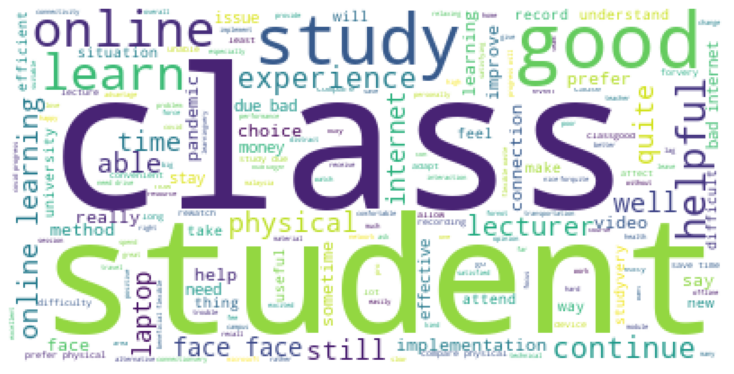

In [ ]:
# Display the generated word cloud
word_cloud = wordcloud.WordCloud(background_color='white') \
.generate(''.join(new_df['What is your opinion for Online Learning Implementation during COVID-19?']))
plt.figure(figsize = (10, 5), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# **Data Modelling**

# Naive Bayes

In [ ]:
## Naive Bayes
NaiveBayesModel = MultinomialNB()

## Fit & predict NB
NB_y_predict = NaiveBayesModel.fit(x_train_vectorizer, y_train).predict(x_test_vectorizer)

## Evaluation of Naive Bayes
NB_Report = classification_report(y_test, NB_y_predict, digits=4)
print(NB_Report)

              precision    recall  f1-score   support

    Negative     0.4000    0.3636    0.3810        11
    Positive     0.8571    0.8750    0.8660        48

    accuracy                         0.7797        59
   macro avg     0.6286    0.6193    0.6235        59
weighted avg     0.7719    0.7797    0.7756        59



# Logistic Regression

In [ ]:
## Logistic Regression
Logistic = LogisticRegression()

## Fit & predict Logistic Regression
Logistic_y_predict = Logistic.fit(x_train_vectorizer, y_train).predict(x_test_vectorizer)

## Evaluation of Logistic Regression
Logistic_Report = classification_report(y_test, Logistic_y_predict, digits=4)
print(Logistic_Report)

              precision    recall  f1-score   support

    Negative     0.7143    0.4545    0.5556        11
    Positive     0.8846    0.9583    0.9200        48

    accuracy                         0.8644        59
   macro avg     0.7995    0.7064    0.7378        59
weighted avg     0.8529    0.8644    0.8521        59



# Support Vector Machine

In [ ]:
## Support Vector Machine
SVM_Model = svm.SVC()

## Fit & predict
SVM_y_predict = SVM_Model.fit(x_train_vectorizer, y_train).predict(x_test_vectorizer)

#Evaluation of Support Vector Machine
SVM_Report = classification_report(y_test, SVM_y_predict, digits=4)
print(SVM_Report)

              precision    recall  f1-score   support

    Negative     1.0000    0.2727    0.4286        11
    Positive     0.8571    1.0000    0.9231        48

    accuracy                         0.8644        59
   macro avg     0.9286    0.6364    0.6758        59
weighted avg     0.8838    0.8644    0.8309        59



# **Optimization**

In [ ]:
## Build another vectorizer with setting
vectorizer2 = CountVectorizer(binary = True, stop_words = 'english')

## learn a vocabulary dictionary of all tokens in raw documents
vectorizer2.fit(list(x_train) + list(x_test))

## transform document into document-term matrix
x_train_vectorizer2 = vectorizer2.transform(x_train.values)
x_test_vectorizer2 = vectorizer2.transform(x_test.values)

## List of words in sparse matrix
Optimize_Vectorize = pd.DataFrame(x_train_vectorizer2.toarray(), 
                                  columns = vectorizer2.get_feature_names())

Optimize_Vectorize

,able,absent,access,achieve,action,activity,actually,adapt,add,advantage,affect,age,agree,allow,alternative,amazing,anymore,anytime,approach,april,area,ask,assignment,assist,attend,attention,attitude,automatically,available,awesome,bad,bandwidth,base,basic,basis,bed,believe,beneficial,benefit,best,better,big,bit,boring,bursary,bus,busy,buy,campus,capability,case,cater,cause,certain,change,choice,choose,circumstance,class,clearly,combine,come,comfort,comfortable,communicate,communication,compare,compensate,computer,concept,conclude,conduct,connection,connectivity,consider,consideration,consistently,continue,control,convenience,convenient,cope,corner,cost,country,course,cover,covid,crisis,current,currently,customer,daily,day,definitely,delay,delivery,demotivating,deteriorate,devastating,device,different,difficult,difficulty,digital,disadvantage,disaster,discipline,disconnect,discussion,disrupt,distance,distract,distracting,distraction,don,download,drag,drive,eager,easily,easy,education,effective,effectiveness,efficient,efficiently,email,embrace,end,ensure,environment,especially,evaluation,eventually,exam,excellent,excited,expectation,experience,extensive,external,eye,face,faced,facilitate,factor,fail,failure,fair,fairly,family,far,fast,feature,fee,feedback,feel,financial,fine,finish,fix,flexibility,flexible,flood,fluidity,focus,force,frame,fresh,friend,friendly,fully,function,fund,furthermore,futuristic,generation,good,government,graduate,great,group,guess,haha,handle,happen,happy,hard,hardware,haven,health,healthy,help,helpdesk,helpful,high,highly,hold,home,honest,honestly,hope,hour,house,immediate,immense,immersive,impact,implement,implementation,important,improve,improvement,inconvenience,inconvenient,inform,information,infrastructure,initially,instance,instead,institute,interaction,interactivity,internet,introvert,irritate,issue,job,just,key,kind,know,knowledge,lack,lag,laptop,later,lazy,lead,learn,learning,leave,lecture,lecturer,lesson,let,life,like,limit,limitation,little,live,living,local,lockdown,long,longer,loss,lot,love,make,malaysia,manage,management,march,material,math,matter,member,mental,message,method,microsoft,minute,mircrosoft,miss,mode,module,money,moodle,motivate,motivation,motivational,navigate,necessary,need,neglect,network,new,nice,non,normal,nowadays,occur,offline,ok,okay,online,opinion,opportunity,optimize,option,outbreak,outcome,overall,package,packet,pandemic,participate,pass,pay,peer,people,perfect,perfectly,performance,period,permanent,personally,physical,physically,platform,play,poor,positive,possible,potential,practice,practise,precautious,prefer,preparation,presence,pretty,previous,pro,proactive,problem,process,productive,productivity,professional,progress,project,prove,provide,pursue,query,question,quite,really,reason,rebate,recall,receive,record,recording,reduce,refer,refresh,refreshing,relax,relaxing,remotely,require,resource,respond,response,review,revise,rewatch,right,rural,safe,satisfied,satisfy,satisfying,save,say,school,screen,search,second,self,send,session,short,significant,simple,sit,situation,skill,sleep,slight,slow,smuggling,social,socialisation,socialize,software,solve,somwhow,sort,sound,spare,special,specific,spend,sport,stable,stay,stinky,store,straight,strange,stress,stressful,strong,student,study,subject,submission,substitute,sudden,sufficient,suitable,sure,surely,surprisingly,teach,teacher,teaching,team,teammate,technical,temporary,term,terrible,test,thank,thing,time,tongue,tool,topic,totally,touch,traditional,transportation,travel,trouble,troublesome,truly,try,tuition,unable,uncertainty,understand,unfortunate,unfortunately,uni,unintended,university,unsure,upgrade,use,useful,user,utility,verbal,video,view,virtually,visio,want,waste,watch,way,weak,week,weigh,wifi,win,winking,wise,work,working,yea,yup,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Oversampling


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=42)
x_resampling, y_resampling = sm.fit_resample(x_train_vectorizer2, y_train)
print(x_resampling.shape)
print(y_resampling.shape)

(368, 492)
(368,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print("After oversampling: ",Counter(y_resampling))

After oversampling:  Counter({'Positive': 184, 'Negative': 184})


# Naive Bayes


In [ ]:
## Naive Bayes Parameter Tuning
# define hyperparameters & grid search
params = [{'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]
         }]

Optimize_NB = GridSearchCV(MultinomialNB(), param_grid = params, 
                                   n_jobs=-1, cv=5, verbose=5)

## Fit Optimize NB
multinomial_nb_grid = Optimize_NB.fit(x_resampling, y_resampling)

## Predict Optimize NB
Optimize_NB_y_predict = multinomial_nb_grid.predict(x_test_vectorizer2)

## Evaluation of Optimize NB
print(classification_report(y_test, Optimize_NB_y_predict, digits=4))    

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


              precision    recall  f1-score   support

    Negative     0.5000    0.9091    0.6452        11
    Positive     0.9744    0.7917    0.8736        48

    accuracy                         0.8136        59
   macro avg     0.7372    0.8504    0.7594        59
weighted avg     0.8859    0.8136    0.8310        59



[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.1s finished


In [ ]:
# summarize results of Naive Bayes
print("Best Summary of Optimize Naive Bayes: \n%f using %s" \
      % (multinomial_nb_grid.best_score_, multinomial_nb_grid.best_params_))

print("----------------------------------------------------------------")
means = multinomial_nb_grid.cv_results_['mean_test_score']
stds = multinomial_nb_grid.cv_results_['std_test_score']
params = multinomial_nb_grid.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("Mean Test Score: %f \
     \nStandard Deviation Test Score: (%f) with: %r" \
      % (mean, stdev, param))

Best Summary of Optimize Naive Bayes: 
0.793373 using {'alpha': 0.1}
----------------------------------------------------------------
Mean Test Score: 0.777231      
Standard Deviation Test Score: (0.060315) with: {'alpha': 0.01}
Mean Test Score: 0.793373      
Standard Deviation Test Score: (0.043224) with: {'alpha': 0.1}
Mean Test Score: 0.787967      
Standard Deviation Test Score: (0.059749) with: {'alpha': 0.5}
Mean Test Score: 0.782525      
Standard Deviation Test Score: (0.071247) with: {'alpha': 1.0}
Mean Test Score: 0.768900      
Standard Deviation Test Score: (0.060650) with: {'alpha': 10.0}


# Logistic Regression

In [ ]:
## Logistic Parameter Tuning
# define hyperparameters and grid search 
grid = dict(solver = ['newton-cg', 'lbfgs', 'liblinear', 'saga', 'sag'], C = [1, 10, 100, 1000])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
Optimize_Logistic = GridSearchCV(LogisticRegression(), param_grid = grid, 
                           n_jobs= -1, cv = cv, scoring = 'accuracy', error_score=0)

## Fit Optimize Logistic
Logistic_grid_result = Optimize_Logistic.fit(x_resampling, y_resampling)

## Predict Optimize Logistic
Optimize_Logistic_y_predict = Logistic_grid_result.predict(x_test_vectorizer2)

## Evaluation of Optimize Logistic
print(classification_report(y_test, Optimize_Logistic_y_predict, digits=4))    

              precision    recall  f1-score   support

    Negative     0.6667    0.9091    0.7692        11
    Positive     0.9773    0.8958    0.9348        48

    accuracy                         0.8983        59
   macro avg     0.8220    0.9025    0.8520        59
weighted avg     0.9194    0.8983    0.9039        59



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
# summarize results of Optimize Logistic Regression
print("Best Summary of Optimize Logistic Regression: \n%f using %s" \
      % (Logistic_grid_result.best_score_, Logistic_grid_result.best_params_))

print("----------------------------------------------------------------")
means = Logistic_grid_result.cv_results_['mean_test_score']
stds = Logistic_grid_result.cv_results_['std_test_score']
params = Logistic_grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("Mean Test Score: %f \
     \nStandard Deviation Test Score: (%f) with: %r" \
      % (mean, stdev, param))

Best Summary of Optimize Logistic Regression: 
0.828979 using {'C': 1000, 'solver': 'saga'}
----------------------------------------------------------------
Mean Test Score: 0.793694      
Standard Deviation Test Score: (0.062338) with: {'C': 1, 'solver': 'newton-cg'}
Mean Test Score: 0.793694      
Standard Deviation Test Score: (0.062338) with: {'C': 1, 'solver': 'lbfgs'}
Mean Test Score: 0.793694      
Standard Deviation Test Score: (0.062338) with: {'C': 1, 'solver': 'liblinear'}
Mean Test Score: 0.808133      
Standard Deviation Test Score: (0.066447) with: {'C': 1, 'solver': 'saga'}
Mean Test Score: 0.799099      
Standard Deviation Test Score: (0.063191) with: {'C': 1, 'solver': 'sag'}
Mean Test Score: 0.817292      
Standard Deviation Test Score: (0.065538) with: {'C': 10, 'solver': 'newton-cg'}
Mean Test Score: 0.817292      
Standard Deviation Test Score: (0.065538) with: {'C': 10, 'solver': 'lbfgs'}
Mean Test Score: 0.817292      
Standard Deviation Test Score: (0.065538) wi

# Support Vector Machine

In [ ]:
## SVM Parameter Tuning
# Set Hyperparameters by cross-validation
SVM_tuned_parameters = [{'kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 
                         'gamma': [1e-3, 1e-4], 
                         'C': [1, 10, 100, 1000]}]

## Perform Grid Search
Optimize_SVM = GridSearchCV(svm.SVC(C=1, probability = True), 
                               SVM_tuned_parameters)           

## Fit Optimize SVM
SVM_Grid_Result = Optimize_SVM.fit(x_resampling, y_resampling)

## Predict Optimize SVM
Optimize_SVM_y_predict = SVM_Grid_Result.predict(x_test_vectorizer2)

## Evaluation of Optimize SVM
print(classification_report(y_test, Optimize_SVM_y_predict, digits=4))         

              precision    recall  f1-score   support

    Negative     0.4500    0.8182    0.5806        11
    Positive     0.9487    0.7708    0.8506        48

    accuracy                         0.7797        59
   macro avg     0.6994    0.7945    0.7156        59
weighted avg     0.8557    0.7797    0.8002        59



In [ ]:
# summarize results of Optimize SVM
print("Best Summary of Optimize SVM: \n%f using %s" % (SVM_Grid_Result.best_score_, 
                                                  SVM_Grid_Result.best_params_))

print("----------------------------------------------------------------")
means = SVM_Grid_Result.cv_results_['mean_test_score']
stds = SVM_Grid_Result.cv_results_['std_test_score']
params = SVM_Grid_Result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("Mean Test Score: %f \
     \nStandard Deviation Test Score: (%f) with: %r" \
      % (mean, stdev, param))

Best Summary of Optimize SVM: 
0.804739 using {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
----------------------------------------------------------------
Mean Test Score: 0.602666      
Standard Deviation Test Score: (0.108601) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
Mean Test Score: 0.793891      
Standard Deviation Test Score: (0.078378) with: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
Mean Test Score: 0.497260      
Standard Deviation Test Score: (0.003355) with: {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}
Mean Test Score: 0.610774      
Standard Deviation Test Score: (0.122450) with: {'C': 1, 'gamma': 0.001, 'kernel': 'sigmoid'}
Mean Test Score: 0.610774      
Standard Deviation Test Score: (0.122450) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
Mean Test Score: 0.793891      
Standard Deviation Test Score: (0.078378) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
Mean Test Score: 0.497260      
Standard Deviation Test Score: (0.003355) with: {'C': 1, 'gamma': 0

# **Model Comparison**

In [ ]:
## Accuracy of all models
print("---------------------------------------------------")
print("-------       Accuracy of the Models        -------")
print("---------------------------------------------------")
print("  Naive Bayes:            ", NaiveBayesModel.score(x_test_vectorizer, y_test))
print("  Logistic Regression:    ", Logistic.score(x_test_vectorizer, y_test))
print("  Support Vector Machine: ", SVM_Model.score(x_test_vectorizer, y_test))
print("---------------------------------------------------")
print("---------------------------------------------------")
print("---  Accuracy of the Models after Optimization  ---")
print("---------------------------------------------------")
print("  Naive Bayes:            ", Optimize_NB.score(x_test_vectorizer2, y_test))
print("  Logistic Regression:    ", Optimize_Logistic.score(x_test_vectorizer2, y_test))
print("  Support Vector Machine: ", Optimize_SVM.score(x_test_vectorizer2, y_test))
print("--------------------------------------------------- \n")

---------------------------------------------------
-------       Accuracy of the Models        -------
---------------------------------------------------
  Naive Bayes:             0.7796610169491526
  Logistic Regression:     0.864406779661017
  Support Vector Machine:  0.864406779661017
---------------------------------------------------
---------------------------------------------------
---  Accuracy of the Models after Optimization  ---
---------------------------------------------------
  Naive Bayes:             0.8135593220338984
  Logistic Regression:     0.8983050847457628
  Support Vector Machine:  0.7796610169491526
--------------------------------------------------- 



In [ ]:
## Get accuracy score of all models
NB_accuracy = round(accuracy_score(y_test, NB_y_predict), 2)
Logistic_accuracy = round(accuracy_score(y_test, Logistic_y_predict), 2)
SVM_accuracy = round(accuracy_score(y_test, SVM_y_predict), 2)
Optimize_NB_accuracy = round(accuracy_score(y_test, Optimize_NB_y_predict), 2)
Optimize_Logistic_accuracy = round(accuracy_score(y_test, Optimize_Logistic_y_predict), 2)
Optimize_SVM_accuracy = round(accuracy_score(y_test, Optimize_SVM_y_predict), 2)

## Create accuracy performance measures set for all models
Model_Name = ["Naive Bayes", "Logistic Regression", "Support Vector Machine", 
              "Optimize NB", "Optimize LR", "Optimize SVM"]
Accuracy_sets = [NB_accuracy, Logistic_accuracy, SVM_accuracy, 
                 Optimize_NB_accuracy, Optimize_Logistic_accuracy, Optimize_SVM_accuracy]

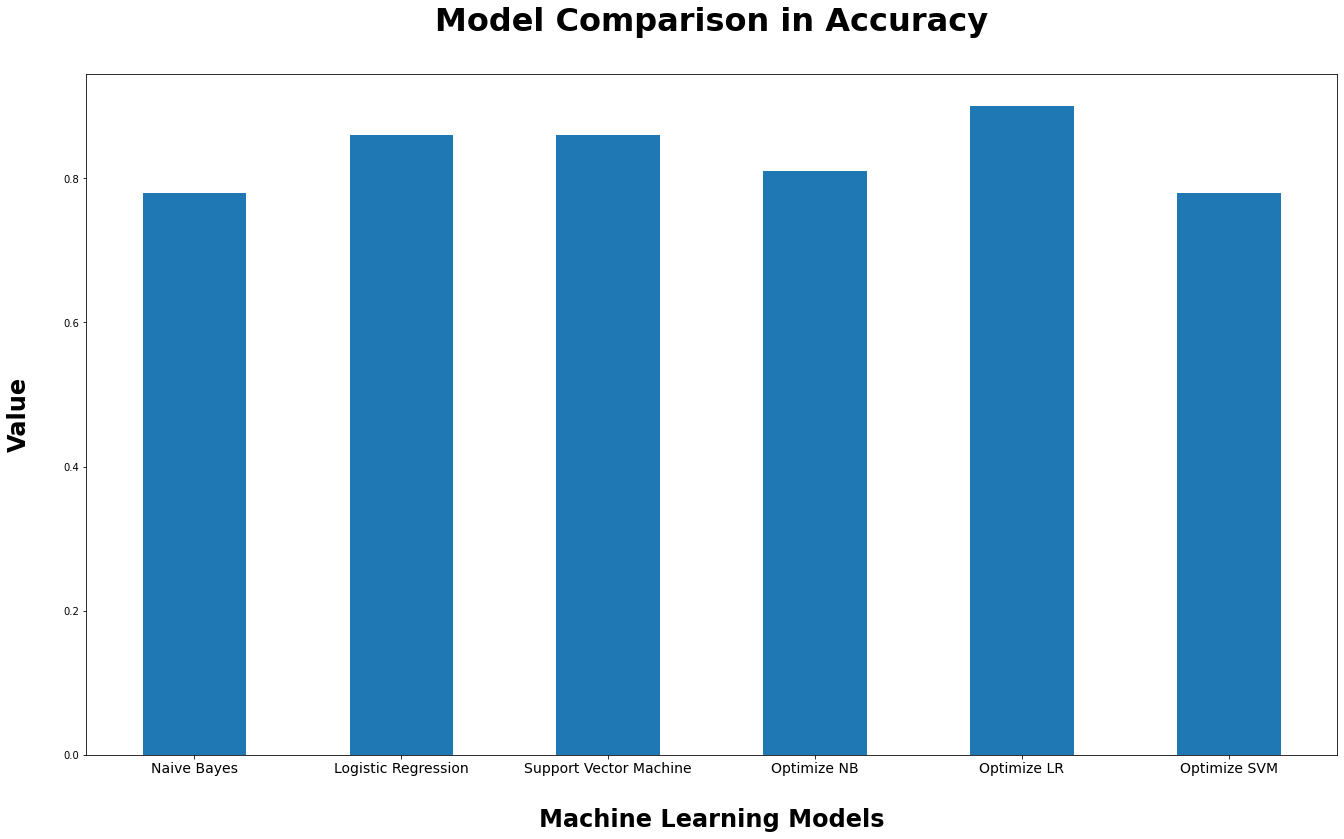

In [ ]:
## Bar Chart for model comparison
w= 0.5

fig, ax = plt.subplots(figsize=(18 , 10))
bar1 = np.arange(len(Model_Name))

plt.bar(bar1, Accuracy_sets, w, label="Accuracy")

fig.tight_layout()
plt.xlabel("\nMachine Learning Models", fontsize=24, fontweight="bold")
plt.xticks(bar1, Model_Name, fontsize=14)
plt.ylabel("Value\n", fontsize=24, fontweight="bold")
plt.title("Model Comparison in Accuracy\n", fontsize=32, fontweight="bold")
plt.show()



## **Test chosen model on random review**

In [ ]:
Review = ["movie is very bad"]
#Review = ["improve our technical skills and flexible where customer can participate in classes from anywhere as long as they have internet connection"]
Review = ["Movie is totally useless and worthless!!!!"]


In [ ]:
## Convert review into string
clean1 =  str(Review)
clean1

"['Movie is totally useless and worthless!!!!']"

In [ ]:
## Convert emoji into text
clean2 =  Emoji_Conversion(clean1)
clean2

"['Movie is totally useless and worthless!!!!']"

In [ ]:
## Perform data cleaning 
clean3 = cleanText(clean2)
clean3

' Movie is totally useless and worthless '

In [ ]:
## Convert into lowercase
clean4 = clean3.lower()
clean4

' movie is totally useless and worthless '

In [ ]:
## Remove stopwords based on custom list 
words = [text for text in clean4.split() if text.lower() not in stop]
clean5 = " ".join(words)
clean5

'movie totally useless and worthless'

In [ ]:
## Perform lemmatization
doc = nlp(clean5)
clean6 = " ".join([word.lemma_ for word in doc])
clean6


'movie totally useless and worthless'

In [ ]:
## Perform extra cleaning
clean7 = remove(clean6)
clean7


'movie totally useless and worthless'

In [ ]:
## Subjectivity & Polarity of clean7
Subjectivity = TextBlob(clean7).sentiment.subjectivity
Polarity = TextBlob(clean7).sentiment.polarity

print("Subjectivity: ", Subjectivity)      
print("Polarity: ", Polarity)

Subjectivity:  0.55
Polarity:  -0.65


In [ ]:
## Test on random single review
vectorize = vectorizer2.transform([clean7])
result = Optimize_Logistic.predict(vectorize)

print(result)

['Negative']


In [ ]:
Review = ["Movie is quite bad"] #Random review
Review = ["improve our technical skills and flexible where customer can participate in classes from anywhere as long as they have internet connection"] #Review from dataset